# ANN - Training Set comparisons

Let's see how the ANN predictions compare to the original training samples. We will look at one particular waveguide case. To do so, we will pick a waveguide with a bend radius of 12 microns, a width of 0.5 microns, and a thickness of 0.2 microns.

We will find an entry in the original training set, and then feed these same input parameters into the ANN. We will then compare the real and imaginary parts.

In [1]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import skrf as rf
import sys
from SiPANN import SiP

INFO:tensorflow:Restoring parameters from /Users/alechammond/Documents/GitHub/SiP-ANN/SiPANN/ANN/TIGHT_GAP/model
INFO:tensorflow:Restoring parameters from /Users/alechammond/Documents/GitHub/SiP-ANN/SiPANN/ANN/TIGHT_STRAIGHT/model
INFO:tensorflow:Restoring parameters from /Users/alechammond/Documents/GitHub/SiP-ANN/SiPANN/ANN/TIGHT_BENT/model


#### Let's load in the original training set

In [2]:
data = np.load('tight_bent.npz')
INPUT = data['INPUT']
OUTPUT = data['OUTPUT']

#### Let's find the real and imaginary parts from the training sets for as simple case:

In [3]:
# Find first index
index1 = np.argmin(np.sum(np.abs(INPUT - [1.5,0.5,0.2,12]) ** 2,axis=1))
# Find last index
index2 = np.argmin(np.sum(np.abs(INPUT - [1.6,0.5,0.2,12]) ** 2,axis=1))

# Build INPUT and OUTPUT subset
INPUT_sub  = INPUT[index1:index2,:]
OUTPUT_sub = OUTPUT[index1:index2,:]

#### Now we will evaluate the same input through the ANN

In [11]:
OUTPUT_ANN = SiP.ANN_bent.output(INPUT_sub)

#### Finally we plot and compare the results

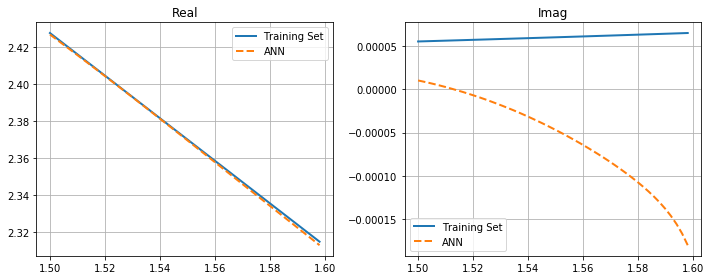

In [14]:
plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
plt.title('Real Part')
plt.plot(INPUT_sub[:,0],np.real(OUTPUT_sub),linewidth=2,label='Training Set')
plt.plot(INPUT_sub[:,0],OUTPUT_ANN[:,0],'--',linewidth=2,label='ANN')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.title('Imaginary Part')
plt.plot(INPUT_sub[:,0],np.imag(OUTPUT_sub),linewidth=2,label='Training Set')
plt.plot(INPUT_sub[:,0],OUTPUT_ANN[:,1],'--',linewidth=2,label='ANN')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

We notice that the real part is bang on. The imaginary part, however, seems to be having trouble. We need to figure out what's going on.